### Scalar example

Consider
$$u'=\lambda(u-\varphi(t)),\quad \lambda=-100, \quad \varphi(t)=\cos t.$$


General solution

$$u(t)=e^{\lambda t} u_0 - \lambda \int_0^t e^{\lambda(t-s)}\varphi(s) ds.$$

Use $$\tau=-\lambda(t-s),$$

$$-\lambda\int_0^t e^{\lambda(t-s)}\varphi(s) ds = \int_0^{-\lambda t} e^{-\tau} \varphi(t+\tau/\lambda) d\tau
\approx \varphi(t)+\varphi'(t)/\lambda+O(\lambda^{-2}).$$

In [1]:
using LinearAlgebra

function ForwardEuler(N,T,u0,lambda)
    dt = T/N
    u = zeros(N+1)
    t = zeros(N+1)
    u[1] = u0
    t = collect(0:N)*dt
    for i = 1 : N
        u[i+1] = u[i] + lambda * dt * (u[i] - cos(t[i]))
    end
    return u
end

function BackEuler(N,T,u0,lambda)
    dt = T/N
    u = zeros(N+1)
    t = zeros(N+1)
    u[1] = u0
    t = collect(0:N)*dt
    for i = 1 : N
        # Solve the implicit equation analytically
        u[i+1] = 1.0 / (1.0 - lambda * dt) * (u[i] - lambda * dt *
            cos(t[i+1]))
    end
    return u
end

BackEuler (generic function with 1 method)

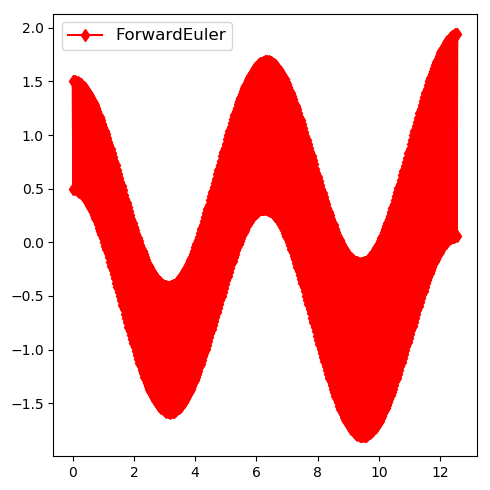

PyObject <matplotlib.legend.Legend object at 0x7f871839c860>

In [27]:
u0 = 1.5
lambda = -100.0
T  = 4.0*pi
dt = 0.02
N  = round(Int64,T/dt)
t  = collect(0:N)*dt
uForwardEuler = ForwardEuler(N,T,u0,lambda)


using PyPlot
figure(1,figsize=(5,5))
plot(t,uForwardEuler,"r-d",label="ForwardEuler")
legend()

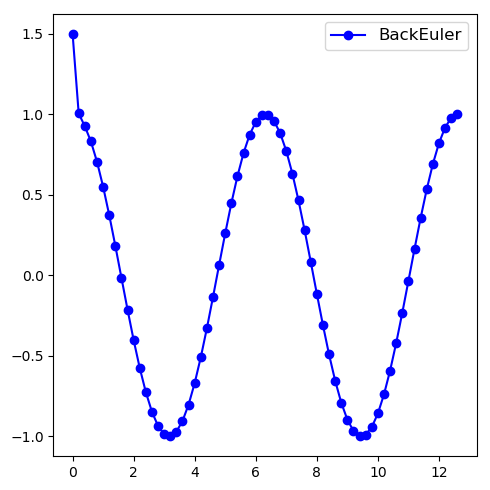

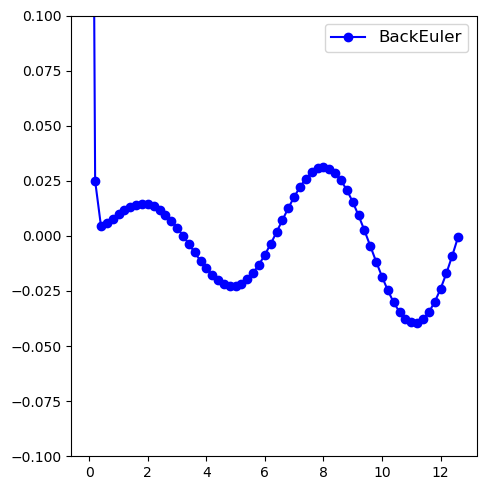

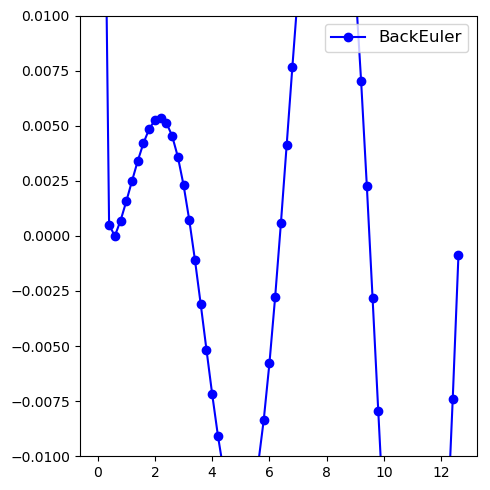

PyObject <matplotlib.legend.Legend object at 0x7f8717ff07f0>

In [30]:
dt = 0.2
N  = round(Int64,T/dt)
t  = collect(0:N)*dt
uBackEuler = BackEuler(N,T,u0,lambda)
figure(1,figsize=(5,5))
plot(t,uBackEuler,"b-o",label="BackEuler")
legend()
figure(2,figsize=(5,5))
plot(t,uBackEuler-cos.(t),"b-o",label="BackEuler")
ylim([-0.1,0.1])
legend()
figure(3,figsize=(5,5))
plot(t,uBackEuler-cos.(t)+sin.(t)/lambda,"b-o",label="BackEuler")
ylim([-0.01,0.01])
legend()

### ODE system

Linear ODE

$$u'=Au,\quad A=\begin{pmatrix} -1000 & 1\\ 0 & -0.1\end{pmatrix}.$$

Solution

$$u(t)=e^{-1000t} u_1 + e^{-0.1t} u_2.$$

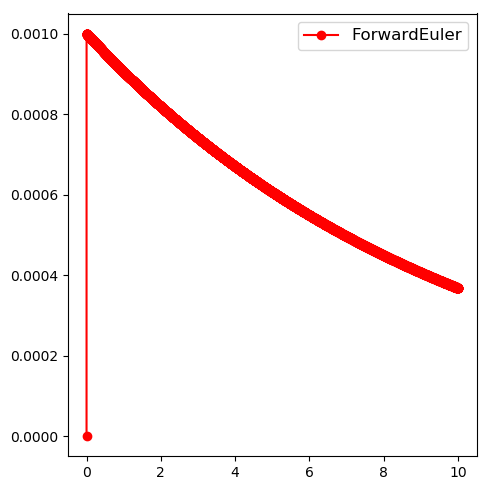

PyObject <matplotlib.legend.Legend object at 0x7f8717d517f0>

In [34]:
function ForwardEuler2(N,T,u0,A)
    dt = T/N
    u = zeros(2,N+1)
    t = zeros(N+1)
    u[:,1] = u0
    t = collect(0:N)*dt
    for i = 1 : N
        u[:,i+1] = u[:,i] + A * dt * u[:,i]
    end
    return u
end

function BackEuler2(N,T,u0,lambda)
    dt = T/N
    u = zeros(2,N+1)
    t = zeros(N+1)
    u[:,1] = u0
    I_2 = Matrix(1.0I,2,2)
    t = collect(0:N)*dt
    for i = 1 : N
        u[:,i+1] = inv(I_2-A*dt) * u[:,i]
    end
    return u
end

u0 = [0.0,1.0]
A = [-1000.0 1.0
0.0 -0.1]
T  = 10.0
dt = 0.001
N  = round(Int64,T/dt)
t  = collect(0:N)*dt
uForwardEuler = ForwardEuler2(N,T,u0,A)


using PyPlot
figure(1,figsize=(5,5))
plot(t,vec(uForwardEuler[1,:]),"r-o",label="ForwardEuler")
legend()

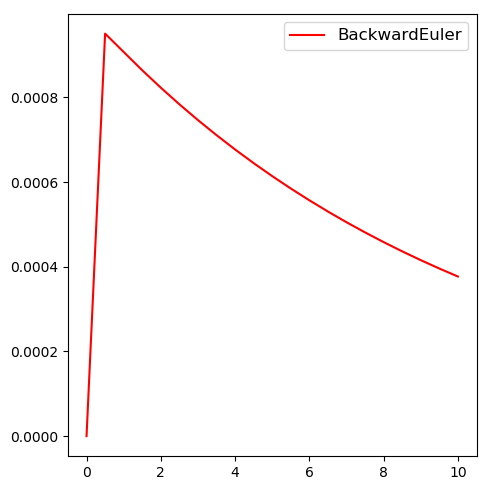

PyObject <matplotlib.legend.Legend object at 0x7f871c8a76d8>

In [5]:
u0 = [0.0,1.0]
A = [-1000.0 1.0
0.0 -0.1]
T  = 10.0
dt = 0.5
N  = round(Int64,T/dt)
t  = collect(0:N)*dt
uBackwardEuler = BackEuler2(N,T,u0,A)


using PyPlot
figure(1,figsize=(5,5))
plot(t,vec(uBackwardEuler[1,:]),"r-",label="BackwardEuler")
legend()

### Heat equation

1D heat equation with periodic boundary condition

$$u_t=u_{xx},\quad x\in [0,2\pi],$$

$$u(x,0)=\sin x, \quad u(0,t)=u(2\pi,t).$$

Finite difference discretization with uniform grid spacing $\Delta x$.


$$u_{i,j}=u(x_i,t_j).$$

$$u_{xx}(x_i,t_j) \approx \frac{u(x_{i-1},t_j)+u(x_{i+1},t_j)-2u(x_i,t_j)}{\Delta x^2}.$$

In [47]:
using SparseArrays

function ForwardEuler3(N,T,u0,A)
    dt = T/N
    Ns = length(u0)
    @assert(Ns == size(A,1) && Ns == size(A,2))
    u = zeros(Ns,N+1)
    t = zeros(N+1)
    u[:,1] = u0
    t = collect(0:N)*dt
    for i = 1 : N
        u[:,i+1] = u[:,i] + A * dt * u[:,i]
    end
    return u
end

Ls = 2*pi
Ns = 160
hs = Ls / Ns
xs = collect(0:Ns-1)*hs

A = 1.0/hs^2 * spdiagm(-1=>ones(Ns-1),0=>-2.0*ones(Ns),1=>ones(Ns-1))
A[1,Ns] = 1.0 / hs^2
A[Ns,1] = 1.0 / hs^2
u0 = sin.(xs)

T  = 3.0
dt = 0.00125/2
N  = round(Int64,T/dt)
t  = collect(0:N)*dt

uForwardEuler = ForwardEuler3(N,T,u0,A);

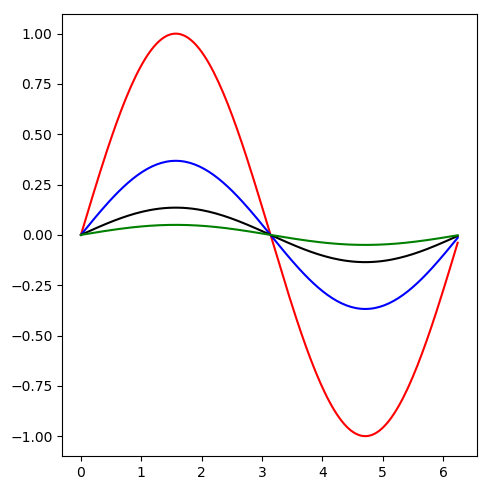

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8717abe828>

In [48]:
using PyPlot
figure(1,figsize=(5,5))
plot(xs,vec(uForwardEuler[:,1]),"r-")
plot(xs,vec(uForwardEuler[:,round(Int,N/3)]),"b-")
plot(xs,vec(uForwardEuler[:,round(Int,2*N/3)]),"k-")
plot(xs,vec(uForwardEuler[:,N]),"g-")

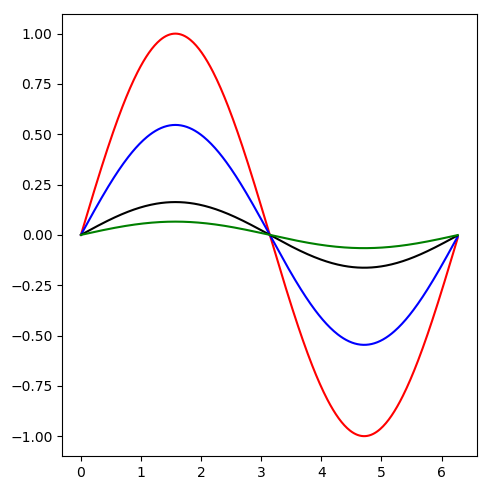

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8717a28da0>

In [49]:
# Trapezoidal (Crank-Nicolson)

function CN(N,T,u0,A)
    dt = T/N
    Ns = length(u0)
    @assert(Ns == size(A,1) && Ns == size(A,2))
    u = zeros(Ns,N+1)
    t = zeros(N+1)
    u[:,1] = u0
    t = collect(0:N)*dt
    I_Ns = sparse(1.0I,Ns,Ns)
    B1 = I_Ns - 0.5*dt*A
    B2 = I_Ns + 0.5*dt*A
    for i = 1 : N
        u[:,i+1] = B1\(B2*u[:,i])
    end
    return u
end

Ls = 2*pi
Ns = 400
hs = Ls / Ns
xs = collect(0:Ns-1)*hs

A = 1.0/hs^2 * spdiagm(-1=>ones(Ns-1),0=>-2.0*ones(Ns),1=>ones(Ns-1))
A[1,Ns] = 1.0 / hs^2
A[Ns,1] = 1.0 / hs^2
u0 = sin.(xs)

T  = 3.0
dt = 0.3
N  = round(Int64,T/dt)
t  = collect(0:N)*dt

uCN = CN(N,T,u0,A);

using PyPlot
figure(1,figsize=(5,5))
plot(xs,vec(uCN[:,1]),"r-")
plot(xs,vec(uCN[:,round(Int,N/3)]),"b-")
plot(xs,vec(uCN[:,round(Int,2*N/3)]),"k-")
plot(xs,vec(uCN[:,N]),"g-")